# Project: Corruption Perception Index

**In this project, I aim to explore the potential correlation between a country's ranking on the Corruption Perception Index (CPI) and various factors, including its GDP, population/area, and historical colonization/origin.**

### The Corruption Perceptions Index (CPI)
The Corruption Perceptions Index (CPI) is the most widely used global corruption ranking in the world. It measures how corrupt each country’s public sector is perceived to be, according to experts and businesspeople
### Gross Domestic Product (GDP)
Gross domestic product or GDP is a measure of the size and health of a country's economy over a period of time (usually one quarter or one year). It is also used to compare the size of different economies at a different point in time.
### Population
A population is the complete set group of individuals, whether that group comprises a nation or a group of people with a common characteristic
### Area
For a country, the total area includes both land area and water bodies (such as lakes, reservoirs, and rivers).
### Colonization
Based on data from the CIA World Factbook, I created a list of the empires and colonizations that the countries listed on the CPI were part of.
#### Preprocessing Data for Analysis
I examined and manipulated the data to prepare it for analysis.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [63]:
#Importing the data.
CPI_GDP = pd.read_csv("CPIbyGDP2.csv")
CPI_Pop = pd.read_csv("CPIbyPopAre2.csv")
CPI_Emp = pd.read_csv("CPIbyEmp2.csv")

## GDP

In [4]:
#understanding the data, so I could manipulate it.
print(CPI_GDP.describe())
print(CPI_GDP.head())
print(CPI_GDP.shape)
print(CPI_GDP["Country / Territory"].nunique())

              Year         Value
count  5779.000000  5.779000e+03
mean   2017.018342  1.576289e+11
std       3.160527  1.119735e+12
min    2012.000000  0.000000e+00
25%    2014.000000  3.900000e+01
50%    2017.000000  8.800000e+01
75%    2020.000000  1.245212e+10
max    2022.000000  2.550000e+13
     Country / Territory Code Region  Year Type        Value
0  Sao Tome and Principe  STP    SSA  2012  GDP  250680845.7
1  Sao Tome and Principe  STP    SSA  2013  GDP  300554483.6
2  Sao Tome and Principe  STP    SSA  2015  GDP  316066072.3
3  Sao Tome and Principe  STP    SSA  2016  GDP  345495615.0
4  Sao Tome and Principe  STP    SSA  2014  GDP  346528329.2
(5779, 6)
179


In [5]:
#changing how the regions show, so it will look better on the vizualizations. 
CPI_GDP["Region"] = CPI_GDP["Region"].map({"WE/EU": "Western Europe/European Union", "SSA": "Sub-Saharan Africa", "AME": "Americas", "AP": "Asia Pacific", "MENA": "Middle East and North Africa"})
CPI_GDP.head()

,Country / Territory,Code,Region,Year,Type,Value
0,Sao Tome and Principe,STP,Sub-Saharan Africa,2012,GDP,250680845.7
1,Sao Tome and Principe,STP,Sub-Saharan Africa,2013,GDP,300554483.6
2,Sao Tome and Principe,STP,Sub-Saharan Africa,2015,GDP,316066072.3
3,Sao Tome and Principe,STP,Sub-Saharan Africa,2016,GDP,345495615.0
4,Sao Tome and Principe,STP,Sub-Saharan Africa,2014,GDP,346528329.2


In [6]:
#To better be able to correlate GDP and CPI. I built individual DataFrames, and removed the empty values. 
GDP = CPI_GDP[CPI_GDP["Type"] == "GDP"]
CPI = CPI_GDP[CPI_GDP["Type"] == "Ranking"]
CPI = CPI.dropna()
GDP = GDP.dropna()

In [7]:
#to better coreelate CPI and GDP, I merged it's DataFrame, using an inner joint, as I wanted only the data from the same countries and years.
#I also create GDP bins, to be able to catalogue the data. 
subset_df = GDP.merge(CPI, on=["Code", "Year"] , how='inner')
subset_df =subset_df.drop(["Country / Territory_y", "Region_y", "Type_y", "Type_x"], axis=1)
subset_df.rename(columns = {'Value_x':'GDP', "Value_y":"Ranking CPI", "Country / Territory_x": "Country", "Region_x": "Region" }, inplace = True)
subset_df["GDP_bins"] = pd.cut(subset_df["GDP"], 180)
subset_df["GDP_bins"] = subset_df["GDP_bins"].astype(str)
subset_df.head()

,Country,Code,Region,Year,GDP,Ranking CPI,GDP_bins
0,Sao Tome and Principe,STP,Sub-Saharan Africa,2012,250680845.7,72.0,"(-25249068473.454, 141915954841.002]"
1,Sao Tome and Principe,STP,Sub-Saharan Africa,2013,300554483.6,72.0,"(-25249068473.454, 141915954841.002]"
2,Sao Tome and Principe,STP,Sub-Saharan Africa,2015,316066072.3,66.0,"(-25249068473.454, 141915954841.002]"
3,Sao Tome and Principe,STP,Sub-Saharan Africa,2016,345495615.0,62.0,"(-25249068473.454, 141915954841.002]"
4,Sao Tome and Principe,STP,Sub-Saharan Africa,2014,346528329.2,76.0,"(-25249068473.454, 141915954841.002]"


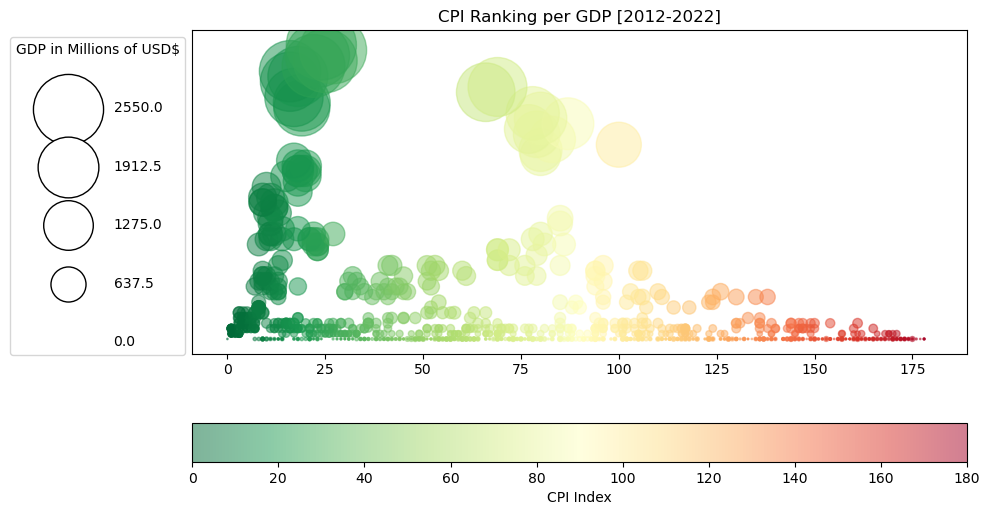

In [8]:
#my main objective was to create a scatter plot, showing the size of the dots as the GDP, and the color as the CPI index, for all the data
#the distribution accross the x are the CPI index ranking.
#and y is the GDP.

y = subset_df["GDP_bins"] #GDP Categories
x = subset_df["Ranking CPI"] # CPI index
colors = subset_df["Ranking CPI"] #color based on the CPI
cmap = sns.color_palette("RdYlGn", as_cmap=True).reversed() #Reversed color to represent that the lower values are the best. 
sizes = subset_df["GDP"]/10000000000 #defining the size of the dots as per a fraction of the GDP, for better vizualization
sizes = sizes.astype(int)
plt.figure(figsize=(10, 6))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap=cmap) #plotting the chart
plt.yticks([]) # removing the ticks, for a better vizualiation

plt.colorbar(label= "CPI Index", location="bottom") #creating the colorbar scale
#creating the legend to show the size and what it represents. 
sizes_legend = np.linspace(sizes.max(), sizes.min(), num=5)
for size, label in zip(sizes_legend, range(1, 6)):
    plt.scatter([], [], c='white', s=size, edgecolor='black', label=size)
plt.legend(title="GDP in Millions of USD$", scatterpoints=1, loc='upper right', bbox_to_anchor=(0, 1), labelspacing = 3.2, handlelength = 5)
plt.title("CPI Ranking per GDP [2012-2022]")
plt.show()

### Observations on the GDP and CPI Index
**From the scatter plot comparing GDP and CPI Index, we can observe that GDP alone is not a decisive factor in determining the perception of corruption. There are smaller economies with low levels of corruption, and larger economies do not necessarily rank at the bottom of the CPI Index, indicating that the perception of corruption can affect a country's growth.**

Text(0.5, 1.0, 'CPI Ranking by Region and GDP [2012-2022]')

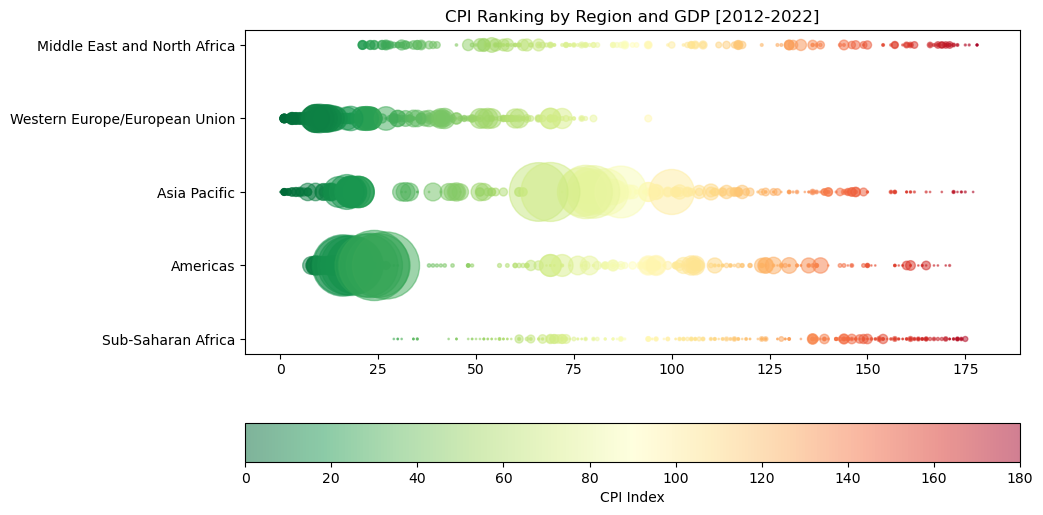

In [9]:
#now I will try the se same chart as before, but with the regions.
region_subset = subset_df.drop(columns=["Country", "Code"])

y = region_subset["Region"] #GDP Categories
x = region_subset["Ranking CPI"] # CPI index
colors = region_subset["Ranking CPI"] #color based on the CPI
cmap = sns.color_palette("RdYlGn", as_cmap=True).reversed() #Reversed color to represent that the lower values are the best. 
sizes = region_subset["GDP"]/10000000000 #defining the size of the dots as per a fraction of the GDP, for better vizualization
sizes = sizes.astype(int)
plt.figure(figsize=(10, 6))

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap=cmap) #plotting the chart

plt.colorbar(label= "CPI Index", location="bottom") #creating the colorbar scale
plt.title("CPI Ranking by Region and GDP [2012-2022]")


### Observations on the CPI Index by Region and GDP
**When analyzing the data by region, we can observe that most regions have a variety of GDPs and CPI Index rankings. Western Europe/European Union does not have countries at the bottom of the CPI Index, while the concentration of countries with lower CPI Index rankings is located in the Middle East and North Africa and Sub-Saharan Africa.**

## Population/Area

In [14]:
#understanding the data, so I could manipulate it.
CPI_Pop.head()
#changing how the regions show, so it will look better on the vizualizations. 
CPI_Pop["Region"] = CPI_Pop["Region"].map({"WE/EU": "Western Europe/European Union", "SSA": "Sub-Saharan Africa", "AME": "Americas", "AP": "Asia Pacific", "MENA": "Middle East and North Africa"})
#prepping the data for analysis
Pop1 = CPI_Pop[CPI_Pop["Type"] == "Population"]
CPI1 = CPI_Pop[CPI_Pop["Type"] == "Ranking"]
Area1 = CPI_Pop[CPI_Pop["Type"] == "Area"]
Pop1 = Pop1.dropna()
CPI1 = CPI1.dropna()
Area1 = Area1.dropna() 
Area1.tail()


,Country / Territory,Code,Region,Year,Type,Value
5871,Vanuatu,VUT,Asia Pacific,2022,Area,12190.0
5905,Yemen,YEM,Middle East and North Africa,2022,Area,527970.0
5939,South Africa,ZAF,Sub-Saharan Africa,2022,Area,1219090.0
5973,Zambia,ZMB,Sub-Saharan Africa,2022,Area,752610.0
6007,Zimbabwe,ZWE,Sub-Saharan Africa,2022,Area,390760.0


In [36]:
#to better coreelate CPI and Area/Population, I merged it's DataFrame, using an inner joint, as I wanted only the data from the same countries and years.
#I also create GDP bins, to be able to catalogue the data. 
subset_PCA = CPI1.merge(Pop1, on=["Code", "Year", "Country / Territory", "Region" ] , how="inner")
subset_PCA = subset_PCA.merge(Area1, on=["Code","Country / Territory", "Region"], how="left" )
subset_PCA = subset_PCA.drop(columns=["Year_y"])
subset_PCA.rename(columns = {'Value_x':'Ranking CPI', "Value_y":"Population", "Value": "Area", "Year_x":"Year"}, inplace = True)
subset_PCA = subset_PCA.drop(columns=["Type_y", "Type_x", "Type"])
subset_PCA["Pop_bins"] = pd.cut(subset_PCA["Population"], 180)
subset_PCA["Area_bins"] = pd.cut(subset_PCA["Area"], 180)
subset_PCA["Pop_bins"] = subset_PCA["Pop_bins"].astype(str)
subset_PCA["Area_bins"] = subset_PCA["Area_bins"].astype(str)
subset_PCA.head()

,Country / Territory,Code,Region,Year,Ranking CPI,Population,Area,Pop_bins,Area_bins
0,Denmark,DNK,Western Europe/European Union,2022,1.0,5903037.0,42920.0,"(-1348285.354, 7941620.967]","(-9579.45, 55185.833]"
1,Denmark,DNK,Western Europe/European Union,2021,1.0,5856733.0,42920.0,"(-1348285.354, 7941620.967]","(-9579.45, 55185.833]"
2,Denmark,DNK,Western Europe/European Union,2020,1.0,5831404.0,42920.0,"(-1348285.354, 7941620.967]","(-9579.45, 55185.833]"
3,Denmark,DNK,Western Europe/European Union,2019,1.0,5814422.0,42920.0,"(-1348285.354, 7941620.967]","(-9579.45, 55185.833]"
4,Denmark,DNK,Western Europe/European Union,2018,1.0,5793636.0,42920.0,"(-1348285.354, 7941620.967]","(-9579.45, 55185.833]"


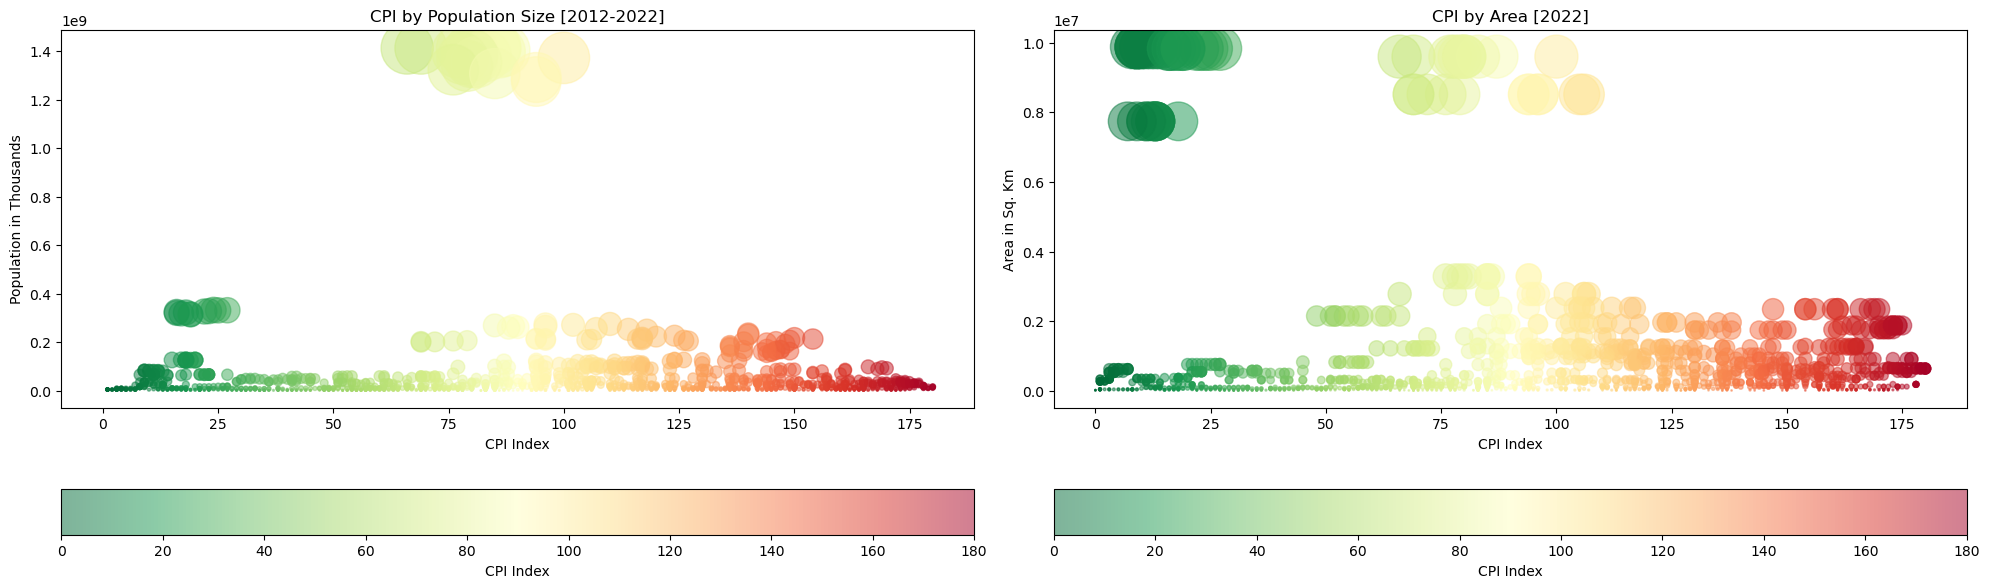

In [61]:

# Create a 1x2 grid for the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# First Scatter Plot
y1 = subset_PCA["Population"] # Population Categories
x1 = subset_PCA["Ranking CPI"] # CPI index
colors1 = subset_PCA["Ranking CPI"] # color based on the CPI
cmap1 = sns.color_palette("RdYlGn", as_cmap=True).reversed() # Reversed color to represent that the lower values are the best. 
sizes1 = subset_PCA["Population"] / 1000000 # defining the size of the dots as per a fraction of the Population, for better visualization
sizes1 = sizes1.astype(int)
scatter1 = axes[0].scatter(x1, y1, c=colors1, s=sizes1, alpha=0.5, cmap=cmap1) # plotting the chart
axes[0].set_title("CPI by Population Size [2012-2022]")
axes[0].set_xlabel("CPI Index")
axes[0].set_ylabel("Population in Thousands")
fig.colorbar(scatter1, ax=axes[0], label="CPI Index", location="bottom") # creating the colorbar scale

# Second Scatter Plot
y2 = subset_PCA["Area"] # Area Categories
x2 = subset_PCA["Ranking CPI"] # CPI index
colors2 = subset_PCA["Ranking CPI"] # color based on the CPI
cmap2 = sns.color_palette("RdYlGn", as_cmap=True).reversed() # Reversed color to represent that the lower values are the best. 
sizes2 = subset_PCA["Area"] / 10000 # defining the size of the dots as per a fraction of the Area, for better visualization
sizes2 = sizes2.astype(int)
scatter2 = axes[1].scatter(x2, y2, c=colors2, s=sizes2, alpha=0.5, cmap=cmap2) # plotting the chart
axes[1].set_title("CPI by Area [2022]")
axes[1].set_xlabel("CPI Index")
axes[1].set_ylabel("Area in Sq. Km")
fig.colorbar(scatter2, ax=axes[1], label="CPI Index", location="bottom") # creating the colorbar scale


plt.tight_layout()# Adjust layout to avoid overlapping titles and labels

plt.show()



### Observations on the CPI Index by Population and Area
**Based on the scatter plots of Population and Area against the CPI Index, we can observe that while Population and Area are not the sole determinants of the CPI Index, they do have some influence. Countries with larger populations are concentrated in the middle of the plot, while there is a concentration of smaller countries with lower CPI Index rankings and medium-sized countries with higher CPI Index rankings.**

## Colonization/Part of Empire

In [84]:
#Getting the empires's values
CPI_Emp["Empire"].unique()

array(['Danish Empire', 'Achaemenid Empire', 'Arab Caliphate',
       'British Empire', 'Durrani Empire', 'Greco-Bactrian Kingdom',
       'Gupta Empire', 'Islamic Republic of Iran', 'Assyrian Empire',
       'Babylonian Empire', 'Aksumite Empire', 'Ethiopian Empire',
       'Almohad Caliphate', 'French Empire', 'Almoravid Caliphate',
       'Byzantine Empire', 'Anglo-Egyptian Sudan', 'Helvetic Republic',
       'Anglo-Saxon England', 'Dutch Empire', 'Ashanti Empire',
       'German Empire', 'Australia', 'Austrian Empire',
       'Austro-Hungarian Empire', 'Czecho-Slovakia',
       "Hungarian People's Republic", 'Belgian Congo', 'Dahomey Empire',
       'Aztec Empire', 'Belgian colony', 'Bruneian Empire',
       'Grand Duchy of Lithuania', 'Han Dynasty',
       'Hashemite Kingdom of Jordan', 'Chola Empire', 'Habsburg Monarchy',
       'Champa Empire', 'Inca Empire', 'Indonesian province',
       'Roman Empire', 'Japanese Empire', 'Kalmar Union', 'Khmer Empire',
       'Knights Hospital

In [94]:
#categorizing the empires for a cleaner visualization. 
CPI_Emp["Category"] = "others"
unique_empires = CPI_Emp["Empire"].unique()

for empire in unique_empires:
    count = CPI_Emp[CPI_Emp["Empire"] == empire].shape[0]
    if count > 40:
        CPI_Emp.loc[CPI_Emp["Empire"] == empire, "Category"] = empire
CPI_Emp.head()

,Country,Code,Region,Empire,Year,Ranking,Category
0,Denmark,DNK,WE/EU,Danish Empire,2022,1,others
1,Denmark,DNK,WE/EU,Danish Empire,2021,1,others
2,Denmark,DNK,WE/EU,Danish Empire,2020,1,others
3,Denmark,DNK,WE/EU,Danish Empire,2019,1,others
4,Denmark,DNK,WE/EU,Danish Empire,2018,1,others


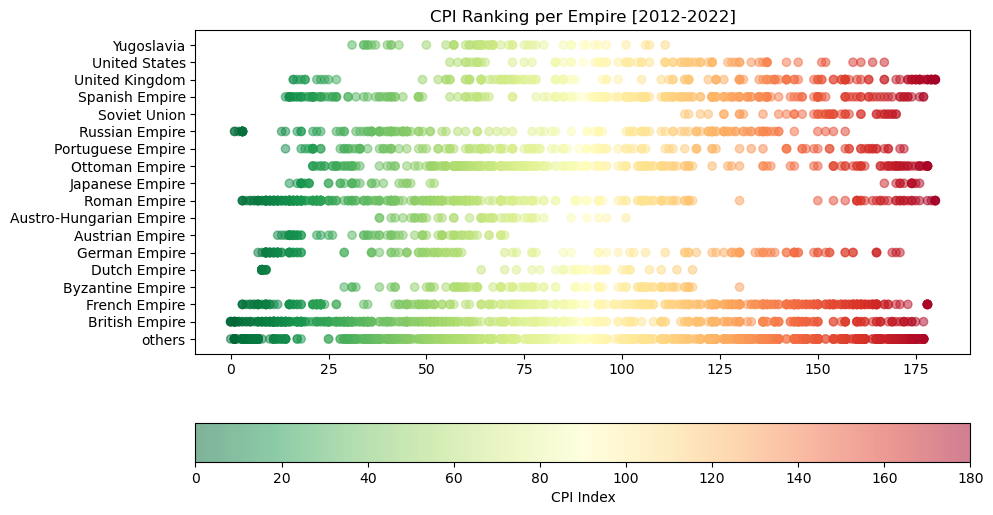

In [95]:
#Creating the plot
y = CPI_Emp["Category"] #Empire Categories
x = CPI_Emp["Ranking"] # CPI index
colors = CPI_Emp["Ranking"] #color based on the CPI
cmap = sns.color_palette("RdYlGn", as_cmap=True).reversed() #Reversed color to represent that the lower values are the best. 
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=colors, alpha=0.5, cmap=cmap) #plotting the chart
plt.colorbar(label= "CPI Index", location="bottom") #creating the colorbar scale
plt.title("CPI Ranking per Empire [2012-2022]")
plt.show()

### Correlation with Colonization/Part of Empire
**The scatter plot of the CPI Index with respect to the empires and colonies a modern country was part of shows that for most empires, the data is concentrated at the extremes of the CPI Index.**

## Conclusion

**After correlating the CPI with GDP, Population/Area, and historical data, it is evident that a country's position on the CPI Index is not solely determined by these three factors. While GDP and Population/Area can influence the CPI Index, they are not the only contributing factors. Further data and analysis will be required to develop a model that predicts a country's position on the CPI Index for the following years, which will be explored in the next phase of this project.**

Data Source:
CIA World Factbook: https://www.cia.gov/the-world-factbook/
United Nations: https://www.un.org/en/
Transparency.org : https://www.transparency.org/
The World Bank: https://data.worldbank.org/